In [1]:
# From Python
# It requires OpenCV installed for Python
from IPython.display import clear_output, Image, display, HTML
import time

import matplotlib.pyplot as plt
import numpy as np

import sys
import cv2
import os
from sys import platform
import argparse

# Import Openpose (Windows/Ubuntu/OSX)
dir_path = os.path.abspath("")
print(dir_path)


/openpose/build/examples/tutorial_api_python


In [2]:
def arrayShow(img):
    _,ret = cv2.imencode('.jpg', img) 
    return Image(data=ret) 

In [3]:
try:
    # Windows Import
    if platform == "win32":
        # Change these variables to point to the correct folder (Release/x64 etc.) 
        sys.path.append(dir_path + '/../../python/openpose/Release');
        os.environ['PATH']  = os.environ['PATH'] + ';' + dir_path + '/../../x64/Release;' +  dir_path + '/../../bin;'
        import pyopenpose as op
    else:
        # Change these variables to point to the correct folder (Release/x64 etc.) 
        sys.path.append('../../python');
        # If you run `make install` (default path is `/usr/local/python` for Ubuntu), you can also access the OpenPose/python module from there. This will install OpenPose and the python library at your desired installation path. Ensure that this is in your python path in order to use it.
        # sys.path.append('/usr/local/python')
        from openpose import pyopenpose as op
except ImportError as e:
    print('Error: OpenPose library could not be found. Did you enable `BUILD_PYTHON` in CMake and have this Python script in the right folder?')
    raise e



In [4]:
# Flags
parser = argparse.ArgumentParser()
parser.add_argument("--image_path", default="../../../examples/media/COCO_val2014_000000000459.jpg", help="Process an image. Read all standard formats (jpg, png, bmp, etc.).")
args = parser.parse_known_args()

# Custom Params (refer to include/openpose/flags.hpp for more parameters)
params = dict()
params["model_folder"] = "../../../models/"
params["hand"] = True
params["hand_detector"] = 2
params["body"] = 0




In [5]:
# Add others in path?
for i in range(0, len(args[1])):
    curr_item = args[1][i]
    if i != len(args[1])-1: next_item = args[1][i+1]
    else: next_item = "1"
    if "--" in curr_item and "--" in next_item:
        key = curr_item.replace('-','')
        if key not in params:  params[key] = "1"
    elif "--" in curr_item and "--" not in next_item:
        key = curr_item.replace('-','')
        if key not in params: params[key] = next_item

# Construct it from system arguments
# op.init_argv(args[1])
# oppython = op.OpenposePython()

# Starting OpenPose
opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

640
516
Body keypoints: 
6.3330763e-37


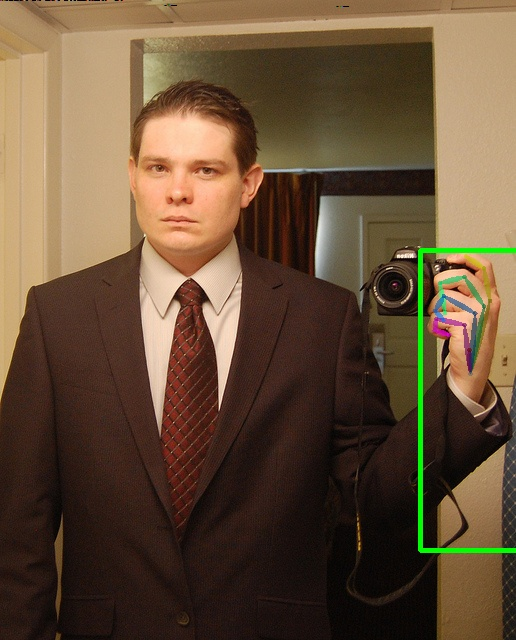

In [6]:
# Process Image
# datum = op.Datum()
imageToProcess = cv2.imread(args[0].image_path)

w,h,_ = imageToProcess.shape
print(w)
print(h)

handRectangles = [
    [
    op.Rectangle(420,250, 200, 200),
    op.Rectangle(0,0,0,0),
    ]
]
datum = op.Datum()
datum.cvInputData = imageToProcess
datum.handRectangles = handRectangles

opWrapper.emplaceAndPop([datum])

# Display Image
print("Body keypoints: \n" + str(datum.poseKeypoints))

datum.cvOutputData = cv2.rectangle(datum.cvOutputData,(420,250),(620,550),(0,255,0),3)


# plt.imshow(datum.cvOutputData)
# plt.show()

img = arrayShow(datum.cvOutputData)
display(img)
